In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.io import loadmat


In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')


--2024-09-16 19:32:11--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  13.7MB/s    in 20s     

2024-09-16 19:32:32 (8.62 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2024-09-16 19:32:32--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  4.22MB/s    in 18s     

2024-09-16 19:32:50 (3.32 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [3]:
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)


Training data shape: (32, 32, 3, 73257)
Test data shape: (32, 32, 3, 26032)


In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [5]:
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)
print('New training data shape:', X_train.shape)


New training data shape: (73257, 32, 32, 3)


In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [9]:
from tensorflow.keras import layers, models, Input

model = models.Sequential()
model.add(Input(shape=(32, 32, 3)))  # Define the input shape using Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 111s 95ms/step - accuracy: 0.5643 - loss: 1.3048 - val_accuracy: 0.8608 - val_loss: 0.4893
Epoch 2/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 138s 92ms/step - accuracy: 0.8771 - loss: 0.4157 - val_accuracy: 0.8847 - val_loss: 0.3982
Epoch 3/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 146s 95ms/step - accuracy: 0.9049 - loss: 0.3251 - val_accuracy: 0.8927 - val_loss: 0.3732
Epoch 4/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 140s 94ms/step - accuracy: 0.9202 - loss: 0.2737 - val_accuracy: 0.8980 - val_loss: 0.3474
Epoch 5/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 115s 100ms/step - accuracy: 0.9308 - loss: 0.2344 - val_accuracy: 0.9087 - val_loss: 0.3316
Epoch 6/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 131s 91ms/step - accuracy: 0.9395 - loss: 0.2053 - val_accuracy: 0.9119 - val_loss: 0.3209
Epoch 7/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9477 - loss: 0.1780 - val_accuracy: 0.9136 - val_loss: 0.3236
Epoch 8/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy:

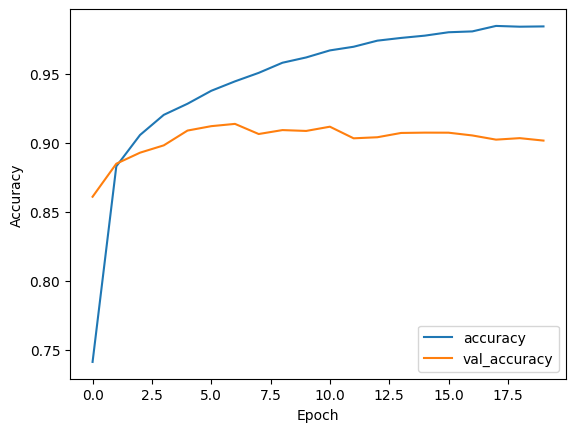

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_accuracy)


814/814 - 13s - 16ms/step - accuracy: 0.9015 - loss: 0.6980
Test accuracy: 0.9014674425125122


In [15]:
# Save the model in the native Keras format
model.save('svhn_cnn_model.keras')
